## Final Project Submission

Please fill out:
* Student name: Giovanni Rosati
* Student pace: part-time
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL: TBD


In [1]:
# imports
import pandas as pd
import numpy as np
from numpy.random import normal

import scipy.stats as stats 
from scipy.stats import norm

import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

# plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# make plots show in the notebook by default
%matplotlib inline

In [2]:
# import the dataset
initial_df = pd.read_csv("kc_house_data.csv")

In [3]:
initial_df.head(10) # initial inspectioin of the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
initial_df.info() # get the # of records and a list of columns with data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
initial_df.describe() # summary stats for each column 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# count the missing or null values in each column
nulls = initial_df.isnull().sum().sort_values(ascending=False)
nulls

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [7]:
# yr_renovated has 3,842 nulls. Maybe this indicates a house has not been "officially" renovated.
# waterfront has 2,376 nulls. This may mean a house that does not have a view of a waterfront.
# view has 63 nulls. This may indicate a house that has not been viewed.

# looking closer at waterfront and view:
print("unique values in waterfront: {}".format(initial_df.waterfront.unique()))
print("unique values in view: {}".format(initial_df.view.unique()))

unique values in waterfront: [nan  0.  1.]
unique values in view: [ 0. nan  3.  4.  2.  1.]


In [8]:
# looking closer at view
np.unique(initial_df.view, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan]),
 array([19422,   330,   957,   508,   317,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1]))

In [9]:
# Because the null values in yr_renovated and waterfront each represent more than 10% of the records, 
# I will keep them as "bins" of their categorical factors.

# view is null in only 63 records out of over 20,000.
# I will leave it as is for the moment.
# These records could potentially be deleted.


In [10]:
# the following factors could be converted to categorical:
# waterfront, zipcode

# view, condition, grade, bedrooms, bathrooms, and floors are ordered categorical variables and were left as-is
# same for yr_removated and yr_built    ???

# Some values are integers or floats, and date is an object

# change date first and create day of week and month categorical factors
initial_df['date'] = pd.to_datetime(initial_df.date)  # cast string to pandas datetime format
initial_df['weekday'] = initial_df['date'].dt.dayofweek.astype('str') # make a new factor for the day of the week
initial_df['month'] = initial_df['date'].dt.month.astype("str") # make a new factor for the month

# factors to be changed to categorical
# to_categorical = ['waterfront', 'view', 'condition', 'grade', 'zipcode', 'yr_built', 'yr_renovated'] # original version
to_categorical = ['waterfront', 'zipcode'] # modified version

# sqft_basement is a string - convert to an int so it doesn't get automaticaly converted to a categorical factor
initial_df['sqft_basement'] = pd.to_numeric(initial_df['sqft_basement'], errors='coerce').fillna(0).astype(np.int64)

# loop through each categorical factor to make the values strings
for factor in to_categorical:
    initial_df[factor] = initial_df[factor].astype('str')

# create the categorical "bins" for the categorical factoes
initial_df = pd.get_dummies(initial_df)

# look at the new dataset
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 111 entries, id to month_9
dtypes: datetime64[ns](1), float64(7), int64(11), uint8(92)
memory usage: 5.0 MB


In [11]:
# the number of columns is now 111, up from 21 initially

# inspect all of the columns now. One column from each categorical factor needds to be deleted.
list(initial_df)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'waterfront_0.0',
 'waterfront_1.0',
 'waterfront_nan',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 '

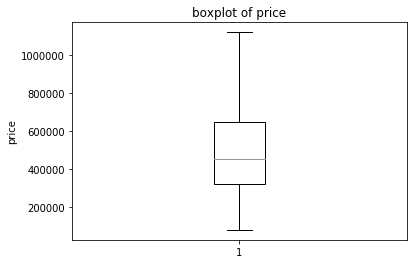

In [12]:
# taking a look at the distribution of the target variable
plt.boxplot(initial_df["price"], 0, '')
plt.title('boxplot of price')
plt.ylabel('price')
plt.show()

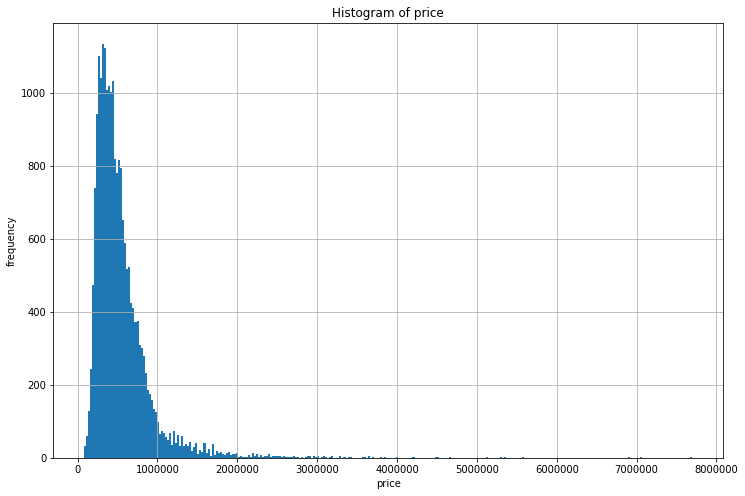

In [13]:
# The box plot shows that 50% of the values are roughly centered around the median.

# create a histogram for price
fig = plt.figure(figsize = (12,8))
fig.add_subplot(111)

plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Histogram of price')
initial_df.price.hist(bins=300)

plt.show()

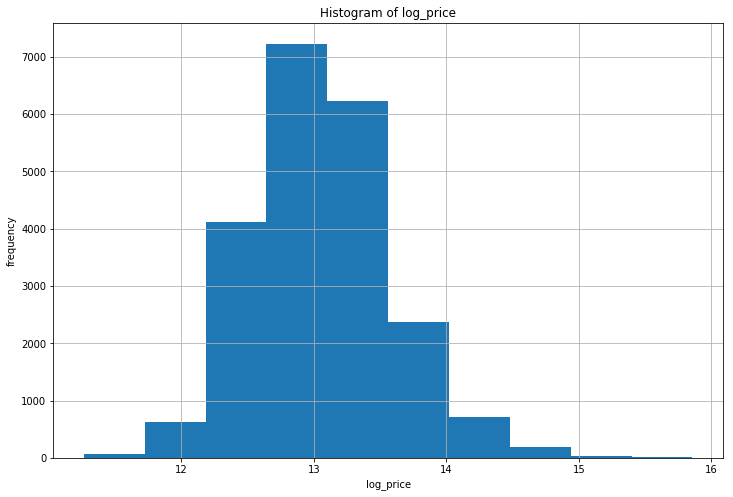

In [14]:
# The distribution of price is right skewed and shows some extreme outliers.

# Because I am interested in "relative" changes to price, I will convert price to a log scale.
# My reasoning is as follows:
# A change of a home from $100,000 to $110,000 could be described as +$10,000 or +10%,
# A change of a home from $1,000,000 to $1,100,000 could be descrived as +$100,000 or 10%.
# I don't want higher value homes to have a disproportionate impact on the other homes.

# Convert price to a log scale in a new dataframe

df2 = initial_df.assign(log_price = np.log(initial_df['price']))

# drop id and the original price columns
df2.drop('price', inplace=True, axis = 1)
df2.drop('id', inplace=True, axis = 1)

# plot a new histogram
fig = plt.figure(figsize = (12,8))
fig.add_subplot(111)

plt.xlabel('log_price')
plt.ylabel('frequency')
plt.title('Histogram of log_price')
df2.log_price.hist();


In [15]:
df2.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,...,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,log_price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233863,3.409825,7.657915,1788.596842,285.716581,...,0.068065,0.057740,0.086818,0.103209,0.111775,0.100847,0.102375,0.089781,0.082002,13.048211
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.765686,0.650546,1.173200,827.759761,439.819830,...,0.251863,0.233256,0.281574,0.304238,0.315096,0.301133,0.303148,0.285874,0.274374,0.526555
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.264464
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.682307
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.017003
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.377006
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.856731


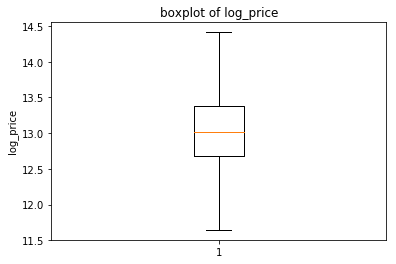

In [16]:
# The hitogram of log_price shows a much more normal distribution.

# boxplot of log_price
plt.boxplot(df2["log_price"], 0, '')
plt.title('boxplot of log_price')
plt.ylabel('log_price')
plt.show()

In [17]:
# Similarly, the boxplot shows a very normal looking distribution

# look at the mean and standard distribution of log_price
norm.fit(df2.log_price)

(13.048210941923953, 0.5265426376308636)

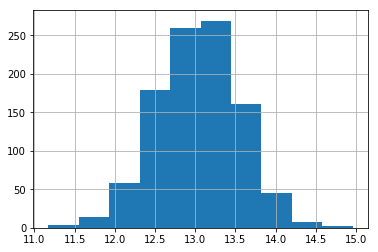

In [18]:
# create a randoml normal distribution using this mean and standard deviation

μ = 13.0482
σ = 0.5265
pd.Series(normal(loc=μ, scale=σ, size=1000)).hist();

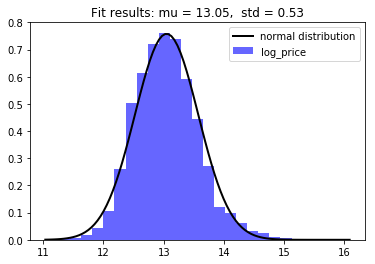

In [19]:
# Plot a histogram of log_price with 25 bins
plt.hist(df2.log_price, bins=25, density=True, alpha=0.6, color='b', label='log_price')  


# Plot the PDF (Probability Density Function) for 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # x is 100 values between min and max
p = norm.pdf(x, μ, σ) # create a normal distribution of values
plt.plot(x, p, 'k', linewidth=2, label='normal distribution') # plot the PDF

plt.legend()

title = "Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ)
plt.title(title);


In [20]:
# log_price fits with the normal PDF very well.

#Look at log_price curve characteristics: skewness and kurtosis
print("Skewness: %f" % df2.log_price.skew())
print("Kurtosis: %f" % df2.log_price.kurt())

Skewness: 0.431004
Kurtosis: 0.691049


In [21]:

# comment about skewness, kurtosis, heterscendacity

df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 110 entries, date to log_price
dtypes: datetime64[ns](1), float64(7), int64(10), uint8(92)
memory usage: 4.9 MB


/Users/giovanni/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


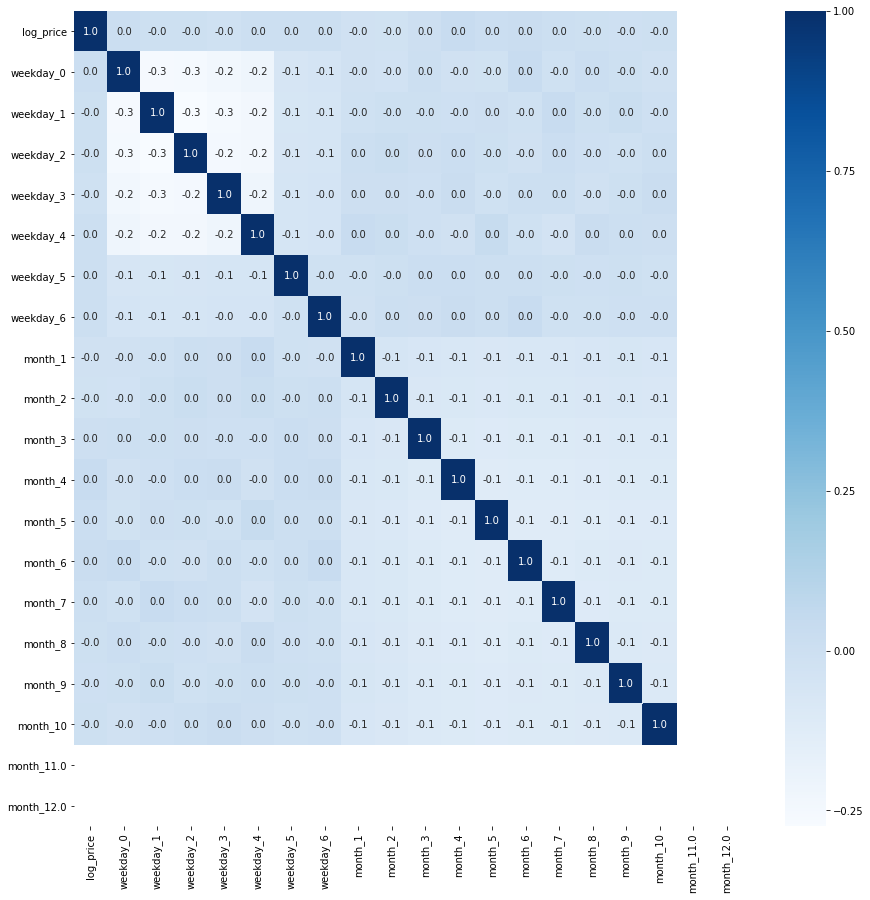

In [22]:
# look at a heatmap for the day_of_week and month as they correlate to log_price

f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df2.loc[:,['log_price',
                             'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 
                             'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 
                             'month_7', 'month_8', 'month_9', 'month_10', 'month_11.0', 'month_12.0', 
                             ]].corr(), 
                                annot=True, cmap="Blues", fmt= '.1f')
plt.show()

/Users/giovanni/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


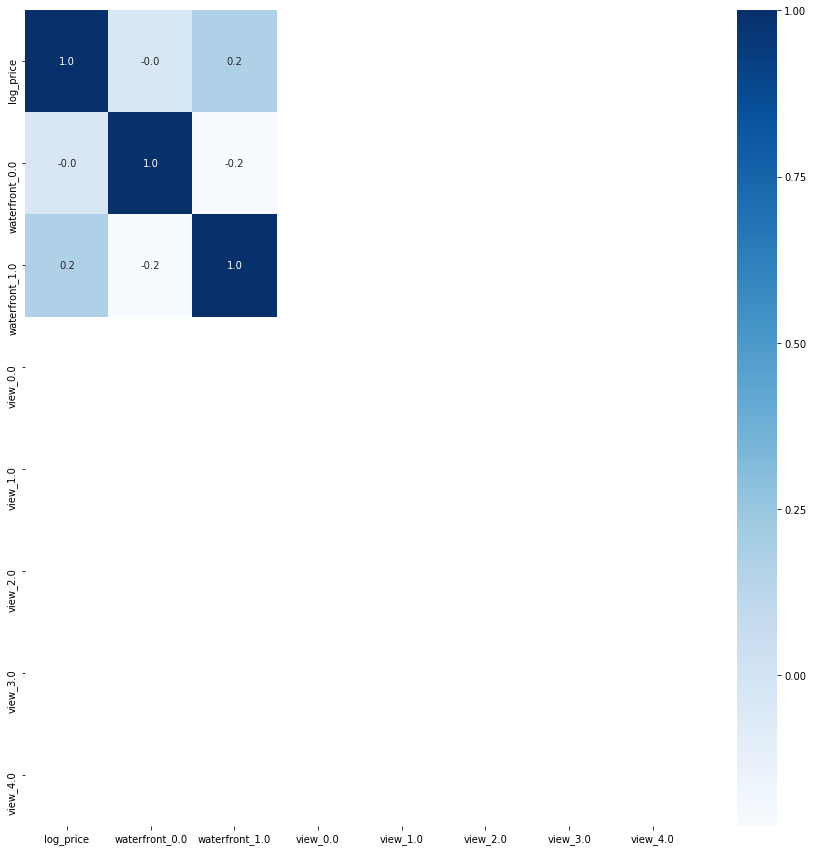

In [23]:
# no apparent correlation with log_price

# look at a heatmap for view and waterfrong as they correlate to log_price


f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df2.loc[:,['log_price',
                             'waterfront_0.0', 'waterfront_1.0',
                             'view_0.0', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0']].corr(), 
                                annot=True, cmap="Blues", fmt= '.1f')
plt.show()

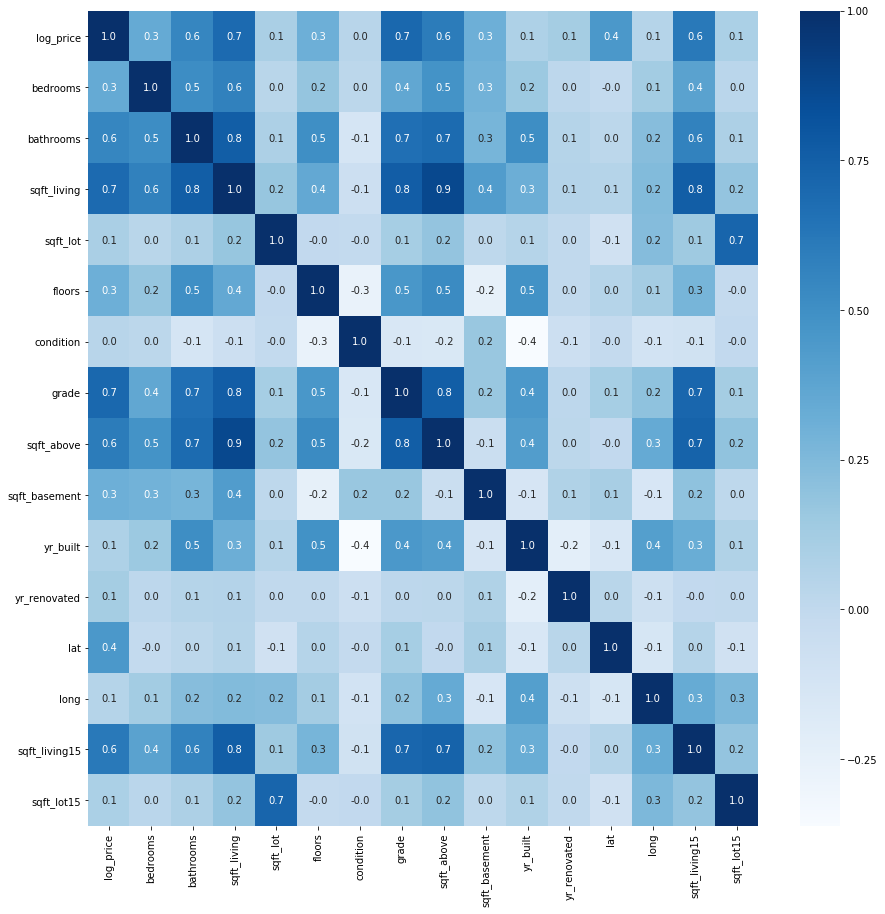

In [24]:
# no apparent correlation with log_price

# look at a heatmap for the continuous and ordered factors as they correlate to log_price

f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df2.loc[:,['log_price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                        'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                        'lat', 'long', 'sqft_living15', 'sqft_lot15', 
                        ]].corr(),
                        annot=True, cmap="Blues", fmt= '.1f',ax=ax)
plt.show()

In [25]:
# the following factors have a correlation to log_price at or above .6:
# * sqft_living15
# * sqft_above
# * grade
# * sqft_living
# * bathrooms

# lat is at .4 and may be useful

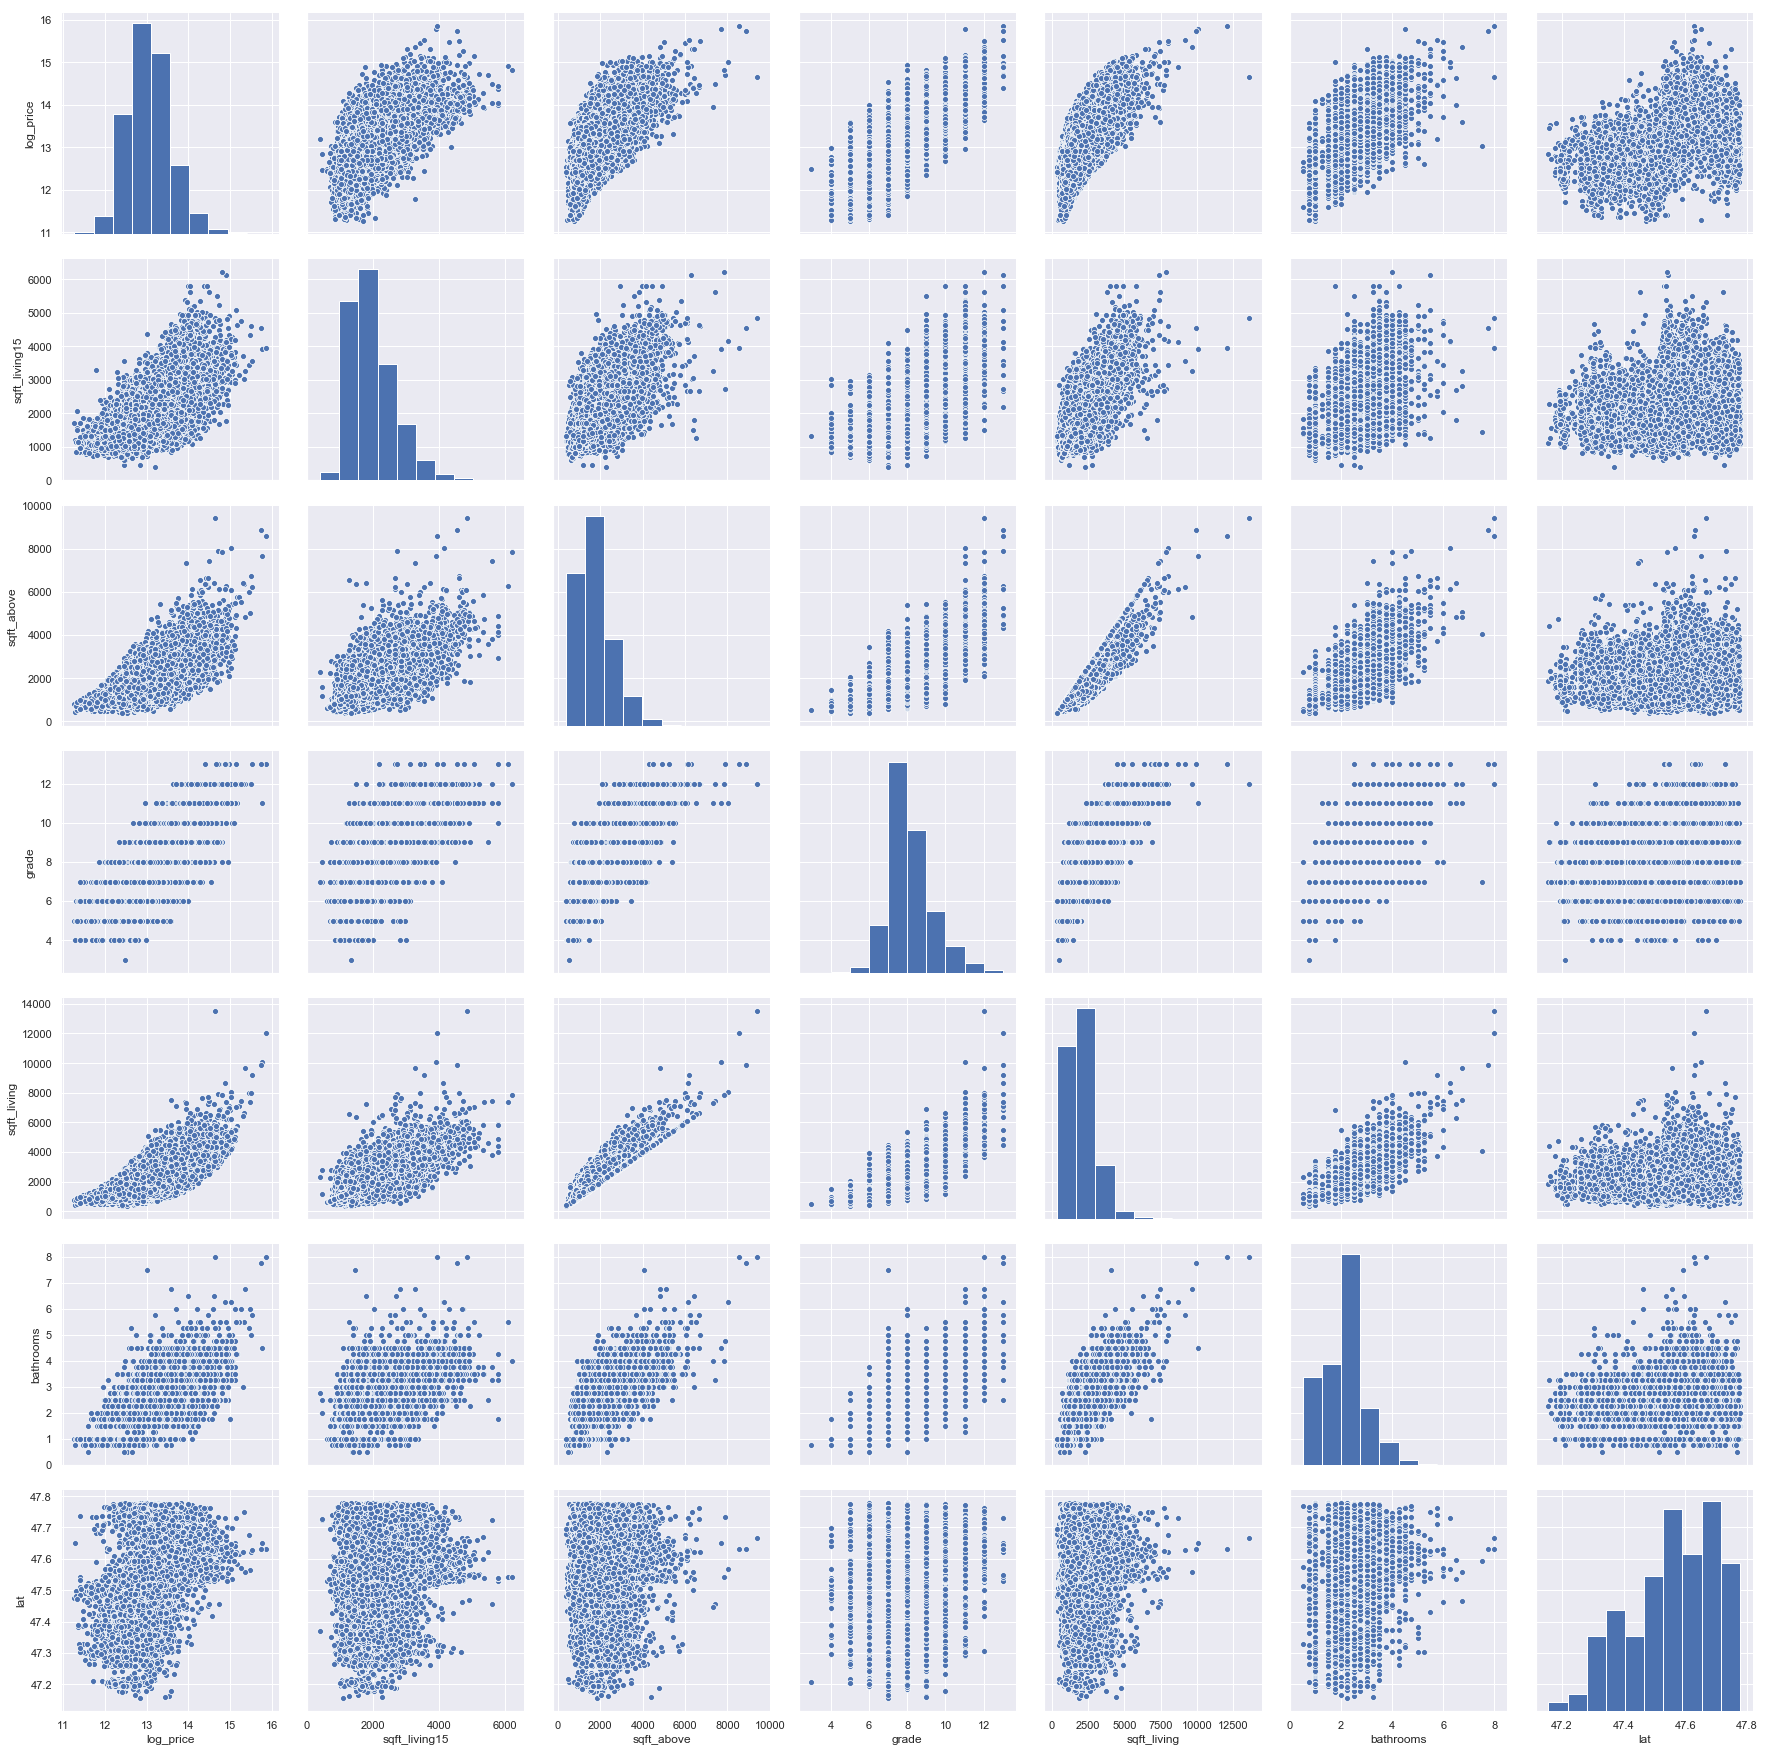

In [26]:
# Another way to explore for correlations - scatterplots
sns.set()
cols = ['log_price', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms', 'lat'] 
sns.pairplot(df2[cols], height = 3.5)

plt.show();

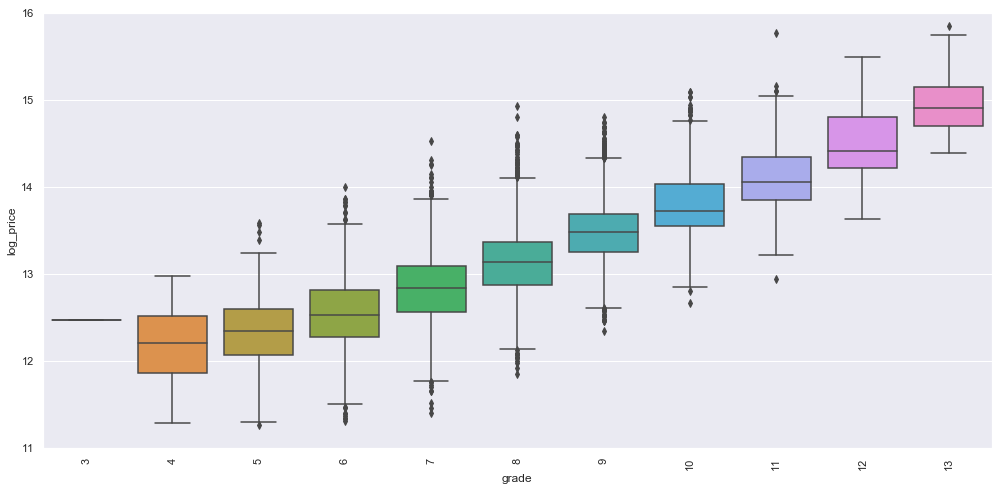

In [27]:
# all 6 of these factors show some degree of correlation to log_price when viewing the scatter plots.

# Look at boxplots for the ordered factors

var = 'grade'
data = pd.concat([df2.log_price, df2[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);

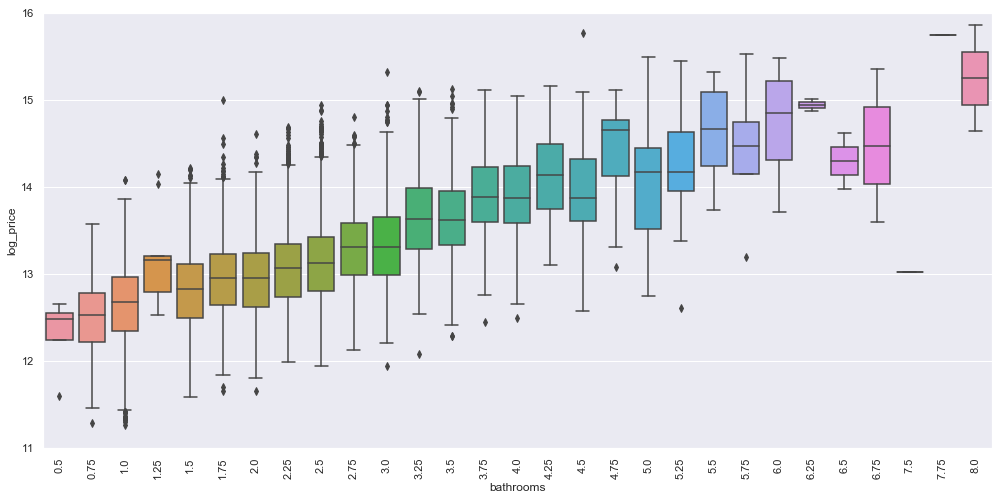

In [28]:
# grade seems to have a strong correlation to price, but there are many outliers. 
# The box plot shows that the middle 50% of each grade shows a very consistent correlation to log_price.

var = 'bathrooms'
data = pd.concat([df2.log_price, df2[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);

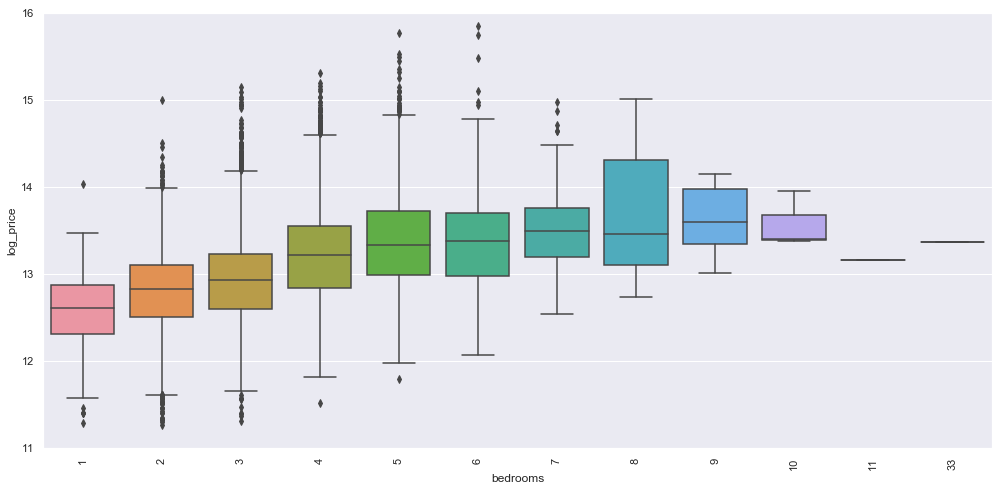

In [29]:
# the number of bathrooms shows a generally positive correlation to price, but with many outliers.

var = 'bedrooms'
data = pd.concat([df2.log_price, df2[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);

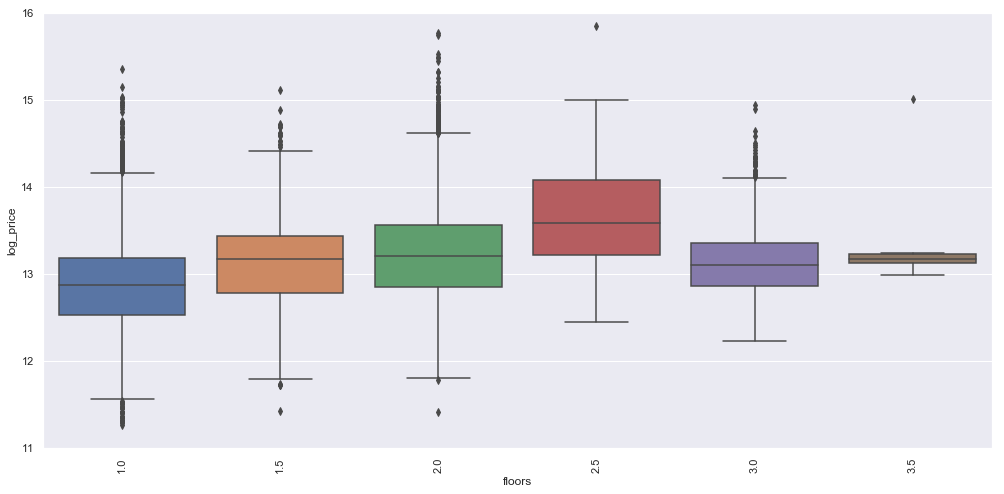

In [30]:
# bedrooms again indicates a slight correlation to log_price from values 1 to 7.
# Above 7 the correlation breaks down.

var = 'floors'
data = pd.concat([df2.log_price, df2[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);

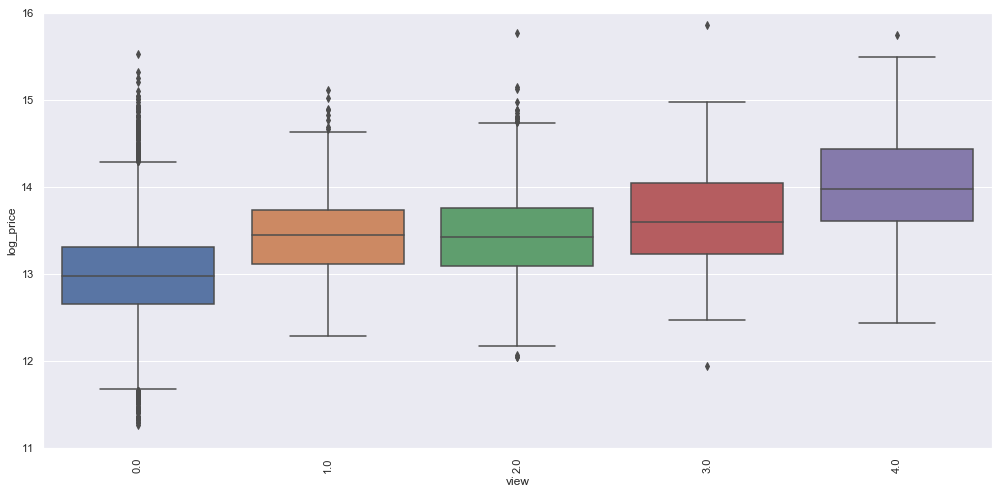

In [31]:
# floors shows a slight positive correlation to log_price, with many outliers

var = 'view'
data = pd.concat([df2.log_price, df2[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);

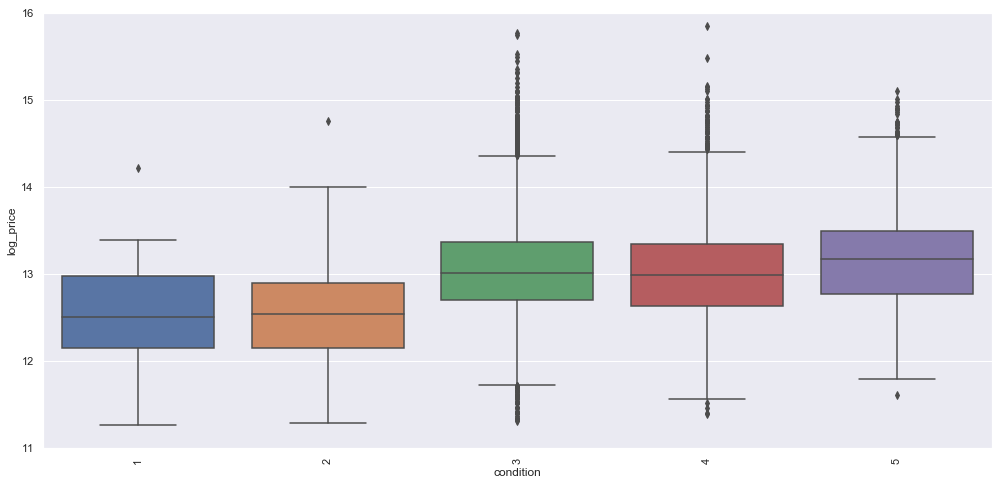

In [32]:
# view seems to have a slight correlation to price, but again there are many outliers. 
# The box plot shows that the median of each view level shows a slight correlation to log_price.

var = 'condition'
data = pd.concat([df2.log_price, df2[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);

In [34]:
# condition shows a slight positive correlation to log_price for levels 3-5 comared to levels 1 & 2.



In [35]:
# based on the boxplots, I am adding bedrooms, floors, and view to the factors to keep:

final_cols = ['log_price', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms', 'lat', 
        'bedrooms' , 'floors', 'view', 'condition']


In [37]:
# delete the columns not used
df2.drop([
    'date',
    'sqft_lot',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'long',
    'sqft_lot15',
    'waterfront_0.0',
    'waterfront_1.0',
    'waterfront_nan',
    'zipcode_98001',
    'zipcode_98002',
    'zipcode_98003',
    'zipcode_98004',
    'zipcode_98005',
    'zipcode_98006',
    'zipcode_98007',
    'zipcode_98008',
    'zipcode_98010',
    'zipcode_98011',
    'zipcode_98014',
    'zipcode_98019',
    'zipcode_98022',
    'zipcode_98023',
    'zipcode_98024',
    'zipcode_98027',
    'zipcode_98028',
    'zipcode_98029',
    'zipcode_98030',
    'zipcode_98031',
    'zipcode_98032',
    'zipcode_98033',
    'zipcode_98034',
    'zipcode_98038',
    'zipcode_98039',
    'zipcode_98040',
    'zipcode_98042',
    'zipcode_98045',
    'zipcode_98052',
    'zipcode_98053',
    'zipcode_98055',
    'zipcode_98056',
    'zipcode_98058',
    'zipcode_98059',
    'zipcode_98065',
    'zipcode_98070',
    'zipcode_98072',
    'zipcode_98074',
    'zipcode_98075',
    'zipcode_98077',
    'zipcode_98092',
    'zipcode_98102',
    'zipcode_98103',
    'zipcode_98105',
    'zipcode_98106',
    'zipcode_98107',
    'zipcode_98108',
    'zipcode_98109',
    'zipcode_98112',
    'zipcode_98115',
    'zipcode_98116',
    'zipcode_98117',
    'zipcode_98118',
    'zipcode_98119',
    'zipcode_98122',
    'zipcode_98125',
    'zipcode_98126',
    'zipcode_98133',
    'zipcode_98136',
    'zipcode_98144',
    'zipcode_98146',
    'zipcode_98148',
    'zipcode_98155',
    'zipcode_98166',
    'zipcode_98168',
    'zipcode_98177',
    'zipcode_98178',
    'zipcode_98188',
    'zipcode_98198',
    'zipcode_98199',
    'weekday_0',
    'weekday_1',
    'weekday_2',
    'weekday_3',
    'weekday_4',
    'weekday_5',
    'weekday_6',
    'month_1',
    'month_10',
    'month_11',
    'month_12',
    'month_2',
    'month_3',
    'month_4',
    'month_5',
    'month_6',
    'month_7',
    'month_8',
    'month_9'], inplace=True, axis=1)



# delete the columns (I choose the "bin" that has NaN. If no NaN column, delete the first column of the group)

# df2.drop(['waterfront_nan', 'zipcode_98001', 'weekday_0',  'month_1'], axis=1, inplace=True) 

In [38]:
# look again at current dataframe columns
list(df2)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'lat',
 'sqft_living15',
 'log_price']

In [39]:
# look again at current columns I wanted
list(final_cols)

['log_price',
 'sqft_living15',
 'sqft_above',
 'grade',
 'sqft_living',
 'bathrooms',
 'lat',
 'bedrooms',
 'floors',
 'view',
 'condition']

In [40]:
# looking for colinearity between the six factors chosen
abs(df2.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,lat,sqft_living15,log_price
bedrooms,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,True,True,False,True,False
floors,False,False,False,True,False,False,False,False,False,False,False
view,False,False,False,False,True,False,False,False,False,False,False
condition,False,False,False,False,False,True,False,False,False,False,False
grade,False,False,True,False,False,False,True,True,False,False,False
sqft_above,False,False,True,False,False,False,True,True,False,False,False
lat,False,False,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,True,False,False,False,False,False,False,True,False


In [41]:
corr_df = abs(df2.corr()) > 0.75
corr_df.sum(axis=1)

bedrooms         1
bathrooms        2
sqft_living      5
floors           1
view             1
condition        1
grade            3
sqft_above       3
lat              1
sqft_living15    2
log_price        1
dtype: int64

In [42]:
# drop all the factors that are strongly correlated with sqft_living
df2.drop([
    'bathrooms',
    'grade',
    'sqft_above',
    'sqft_living15',], inplace=True, axis=1)

In [43]:
# re-run the correlation test again
corr_df = abs(df2.corr()) > 0.75
corr_df.sum(axis=1)

bedrooms       1
sqft_living    1
floors         1
view           1
condition      1
lat            1
log_price      1
dtype: int64

In [55]:
# count the missing or null values in each column
nulls = df2.isnull().sum().sort_values(ascending=False)
nulls

view           63
log_price       0
lat             0
condition       0
floors          0
sqft_living     0
bedrooms        0
dtype: int64

In [56]:
# look at df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
bedrooms       21597 non-null int64
sqft_living    21597 non-null int64
floors         21597 non-null float64
view           21534 non-null float64
condition      21597 non-null int64
lat            21597 non-null float64
log_price      21597 non-null float64
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


In [57]:
# drop the 63 records where view is null
# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)  from pandas documentation

df2.dropna(subset=['view'], inplace=True)

In [58]:
# look at df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 7 columns):
bedrooms       21534 non-null int64
sqft_living    21534 non-null int64
floors         21534 non-null float64
view           21534 non-null float64
condition      21534 non-null int64
lat            21534 non-null float64
log_price      21534 non-null float64
dtypes: float64(4), int64(3)
memory usage: 1.3 MB


In [59]:
# create matrix X and y containing the predictors and target for the model. 
y = df2[['log_price']] # dependent varialbe
X = df2.drop(['log_price'], axis=1) # independent variables
X.head() # look at the first five records in X

,bedrooms,sqft_living,floors,view,condition,lat
0,3,1180,1.0,0.0,3,47.5112
1,3,2570,2.0,0.0,3,47.7210
2,2,770,1.0,0.0,3,47.7379
3,4,1960,1.0,0.0,5,47.5208
4,3,1680,1.0,0.0,3,47.6168


In [60]:
# ENDED UP NOT USING THIS????

# try using MSE with from 15 to 315 factors in steps of 10
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# MSE_test = []
# MSE_train = []
# list_n = list(range(15,316,10))  # use 15 - 315 factors, step by 10
# for n in list_n: 
#     select_n = RFE(linreg, n_features_to_select = n)
#     select_n = select_n.fit(X_train, np.ravel(y_train))
#     selected_columns = X.columns[select_n.support_ ]
#     linreg.fit(X_train[selected_columns],y_train)
#     yhat_train = linreg.predict(X_train[selected_columns])
#     yhat_test = linreg.predict(X_test[selected_columns])
#     mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
#     mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
#     print ('MSE and adjusted MSE using {} features:'.format(n))
#     print(mse_train)
#     print(mse_test)
#     print('----------------------')
# MSE_test.append(mse_test)
# MSE_train.append(mse_train)

In [61]:
# I selected the top 6 correlated factors from the heatmap to calculate r-squared, intercept, slope, and p-value

col_names = ['bedrooms', 'sqft_living', 'floors', 'view', 'condition', 'lat']

# make an array of statistical results for each of the 6 factors
results_log = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]

# loop through the factors, calculating r_squared, intercept, slope, and p-value
for idx, val in enumerate(col_names):
#     print ("log_price~" + val)
#     print ("------------------------------")
    f = 'log_price~' + val  # string for the formula
    model = smf.ols(formula=f, data=df2).fit()  # create the model
    X_new = pd.DataFrame({val: [df2[val].min(), df2[val].max()]});  # get min and max for the factor
    preds = model.predict(X_new)  # get the predictions
    # add the values to the results array
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#     print(results_log[idx+1])
#     print("\n")

In [62]:
# look at the results of the calculations
pd.DataFrame(results_log)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.117505,12.3912,0.194744,0
2,sqft_living,0.482727,12.2191,0.000398574,0
3,floors,0.0964055,12.5957,0.302728,0
4,view,0.119346,12.9925,0.237461,0
5,condition,0.00147454,12.9421,0.0310611,1.73334e-08
6,lat,0.201717,-68.1071,1.70637,0


In [63]:
# compare predictions using from 1 to 6 of these features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [64]:
y.describe()

,log_price
count,21534.000000
mean,13.048040
std,0.526307
min,11.264464
25%,12.682307
50%,13.017003
75%,13.377006
max,15.856731


In [65]:
X.describe()

,bedrooms,sqft_living,floors,view,condition,lat
count,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,3.373038,2079.827854,1.494126,0.233863,3.409724,47.560180
std,0.926410,917.446520,0.539806,0.765686,0.650654,0.138528
min,1.000000,370.000000,1.000000,0.000000,1.000000,47.155900
25%,3.000000,1430.000000,1.000000,0.000000,3.000000,47.471200
50%,3.000000,1910.000000,1.500000,0.000000,3.000000,47.571900
75%,4.000000,2550.000000,2.000000,0.000000,4.000000,47.678100
max,33.000000,13540.000000,3.500000,4.000000,5.000000,47.777600


In [66]:
r_list = []
adj_r_list = []
list_n = list(range(1,7,1))  # try 1,2,3,4,5 and 6 factors
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))  
    # Per Jeff, some methods in sklearn require this format:  y.values.reshape(-1,1)
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print('Using factor(s): ')
    print(selected_columns)
    print('r-squared:')
    print(r_squared)
    print("---")
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('adjusted-r-squared:')
    print(adjusted_r_squared)
    print('----------------------')
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

Using factor(s): 
Index(['lat'], dtype='object')
r-squared:
log_price    0.201717
dtype: float64
---
adjusted-r-squared:
log_price    0.201495
dtype: float64
----------------------
Using factor(s): 
Index(['floors', 'lat'], dtype='object')
r-squared:
log_price    0.285036
dtype: float64
---
adjusted-r-squared:
log_price    0.284837
dtype: float64
----------------------
Using factor(s): 
Index(['floors', 'view', 'lat'], dtype='object')
r-squared:
log_price    0.397071
dtype: float64
---
adjusted-r-squared:
log_price    0.396903
dtype: float64
----------------------
Using factor(s): 
Index(['bedrooms', 'floors', 'view', 'lat'], dtype='object')
r-squared:
log_price    0.473589
dtype: float64
---
adjusted-r-squared:
log_price    0.473442
dtype: float64
----------------------
Using factor(s): 
Index(['bedrooms', 'floors', 'view', 'condition', 'lat'], dtype='object')
r-squared:
log_price    0.481266
dtype: float64
---
adjusted-r-squared:
log_price    0.481121
dtype: float64
-----------------

In [ ]:
# Both r-squared and adjusted r-squared increase as additional factors are used.


In [67]:
# compute Mean Squared Error using 1 to 6 factors
# try using MSE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

MSE_test = []
MSE_train = []
list_n = list(range(1,7,1))  # try 1,2,3,4,5 and 6 factors
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
    print ('Using {} feature(s):'.format(n))
    print(selected_columns)
    print('MSE train:')
    print(mse_train)
    print('---')
    print('MSE test:')
    print(mse_test)
    print('----------------------')
MSE_test.append(mse_test)
MSE_train.append(mse_train)

Using 1 feature(s):
Index(['lat'], dtype='object')
MSE train:
log_price    0.219452
dtype: float64
---
MSE test:
log_price    0.22776
dtype: float64
----------------------
Using 2 feature(s):
Index(['floors', 'lat'], dtype='object')
MSE train:
log_price    0.196552
dtype: float64
---
MSE test:
log_price    0.203979
dtype: float64
----------------------
Using 3 feature(s):
Index(['floors', 'view', 'lat'], dtype='object')
MSE train:
log_price    0.166303
dtype: float64
---
MSE test:
log_price    0.169818
dtype: float64
----------------------
Using 4 feature(s):
Index(['bedrooms', 'floors', 'view', 'lat'], dtype='object')
MSE train:
log_price    0.145753
dtype: float64
---
MSE test:
log_price    0.146109
dtype: float64
----------------------
Using 5 feature(s):
Index(['bedrooms', 'floors', 'view', 'condition', 'lat'], dtype='object')
MSE train:
log_price    0.143651
dtype: float64
---
MSE test:
log_price    0.143891
dtype: float64
----------------------
Using 6 feature(s):
Index(['bedroom

In [68]:
# MSE lowers after each addition of an additional factor

In [69]:
# cross validation using negative mean squared error
# split data into 5 folds, train on 4, test on the one held out

# selected_columns = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'lat']

cv_5_results = []
# cv_5_results = cross_val_score(linreg, X[selected_columns], y, cv=5, scoring="neg_mean_squared_error")
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")


# r-squared and others are options for scoring
# neg_mean_squared_error * -1 = MSE

# look at the 5 values
print('results of 5 runs of negative mean squared error:')
print(cv_5_results)
print(' ')
# get the mean of the 5 trials
print('mean of the 5 runs:')
print(np.mean(cv_5_results))

results of 5 runs of negative mean squared error:
[-0.08839554 -0.08611114 -0.08643599 -0.08707192 -0.07585445]
 
mean of the 5 runs:
-0.08477380702898626


In [70]:
# split data into 10 folds, train on 9, test on the remaining one

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# selected_columns = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'lat']

cv_10_results = []
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")

# look at the 10 values
print('results of 10 runs of negative mean squared error:')
print(cv_10_results)
print(' ')
# get the mean of the 10 trials
print('mean of the 10 runs:')
print(np.mean(cv_10_results))

results of 10 runs of negative mean squared error:
[-0.08345501 -0.09333484 -0.08648768 -0.08578559 -0.08198452 -0.09087267
 -0.0868426  -0.08736359 -0.08359639 -0.06800264]
 
mean of the 10 runs:
-0.08477255233738445


In [ ]:
# nearly identical results using 5 or 10 folds

In [71]:
# create a model using all 6 factors

#Multiple Regression - from Eli - 
# https://github.com/jet2016/House_Prices_Data_Analysis/blob/master/House_Prices_Final_Project.ipynb
# import statsmodels.formula.api as smf
# model = 'SalePrice ~ GrLivArea + OverallQual + TotalBsmtSF + YearBuilt +GarageCars'
# smf.ols(formula=model, data=df_houseprices).fit().summary()


model = 'log_price ~ bedrooms + sqft_living + floors + view + condition + lat'
smf.ols(formula=model, data=df2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     8147.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:30:32   Log-Likelihood:                -3973.7
No. Observations:               21534   AIC:                             7961.
Df Residuals:                   21527   BIC:                             8017.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -62.4202      0.683    -91.363      0.000     -63.759     -61.081
bedrooms       -0.0271      0.003    -10.228      0.000      -0.032      -0.022
sqft_living     0.0004   2.93e-06    122.463      0.000       0.000       0.000
floors          0.0973      0.004     23.858      0.000       0.089       0.105
view            0.1116      0.003     40.875      0.000       0.106       0.117
condition       0.0829      0.003     26.097      0.000       0.077       0.089
lat             1.5635      0.014    108.849      0.000       1.535       1.592
==============================================================================
Omnibus:                      645.564   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1714.843
Skew:                           0.035   Prob(JB):                         0.00
Kurtosis:                       4.381   Cond. No.                     7.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
# try making sqft_living a log value
df3 = df2.assign(log_sqft_living = np.log(df2['sqft_living']))

df3.describe()

,bedrooms,sqft_living,floors,view,condition,lat,log_price,log_sqft_living
count,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,3.373038,2079.827854,1.494126,0.233863,3.409724,47.560180,13.048040,7.550516
std,0.926410,917.446520,0.539806,0.765686,0.650654,0.138528,0.526307,0.424158
min,1.000000,370.000000,1.000000,0.000000,1.000000,47.155900,11.264464,5.913503
25%,3.000000,1430.000000,1.000000,0.000000,3.000000,47.471200,12.682307,7.265430
50%,3.000000,1910.000000,1.500000,0.000000,3.000000,47.571900,13.017003,7.554859
75%,4.000000,2550.000000,2.000000,0.000000,4.000000,47.678100,13.377006,7.843849
max,33.000000,13540.000000,3.500000,4.000000,5.000000,47.777600,15.856731,9.513404


In [76]:
model = 'log_price ~ log_sqft_living + floors + view + condition + lat'
smf.ols(formula=model, data=df3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     9185.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:48:52   Log-Likelihood:                -4436.2
No. Observations:               21534   AIC:                             8884.
Df Residuals:                   21528   BIC:                             8932.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -69.0692      0.697    -99.118      0.000     -70.435     -67.703
log_sqft_living     0.7200      0.005    135.496      0.000       0.710       0.730
floors              0.0926      0.004     22.082      0.000       0.084       0.101
view                0.1331      0.003     48.604      0.000       0.128       0.138
condition           0.0729      0.003     22.524      0.000       0.067       0.079
lat                 1.6035      0.015    109.452      0.000       1.575       1.632
==============================================================================
Omnibus:                      471.121   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.545
Skew:                           0.271   Prob(JB):                    7.27e-138
Kurtosis:                       3.641   Cond. No.                     1.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""